In [9]:
import sys
import os
import warnings

sys.path.append(os.path.abspath('../script'))
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from download_data import DataDownloader
from talib_calculator import TalibCalculator
from visualizer import Visualizer
from portifolio import PortfolioManager as pm

In [3]:
download = DataDownloader()

In [4]:
tickers = ['AMZN','META','MSFT','NVDA']
dfs = download.download_multiple_stocks(tickers, "2024-01-01", "2024-12-30", interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
for key, value in dfs.items():
    value.columns = value.columns.get_level_values(0)
    talib = TalibCalculator(value)
    
    value['SMA_20'] = talib.calculate_sma(20)
    value['SMA_50'] = talib.calculate_sma(50)
    value["EMA_20"] = talib.calculate_ema(20)
    value["RSI"] = talib.calculate_rsi(14)
    value["MACD"], value['MACD_Signal'], value['MACD_Hist'] = talib.calculate_macd()    

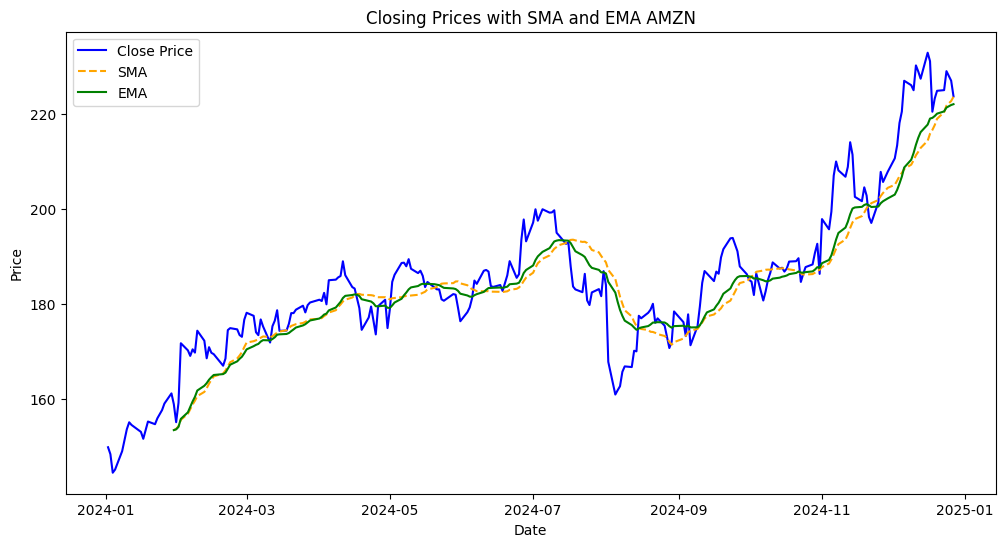

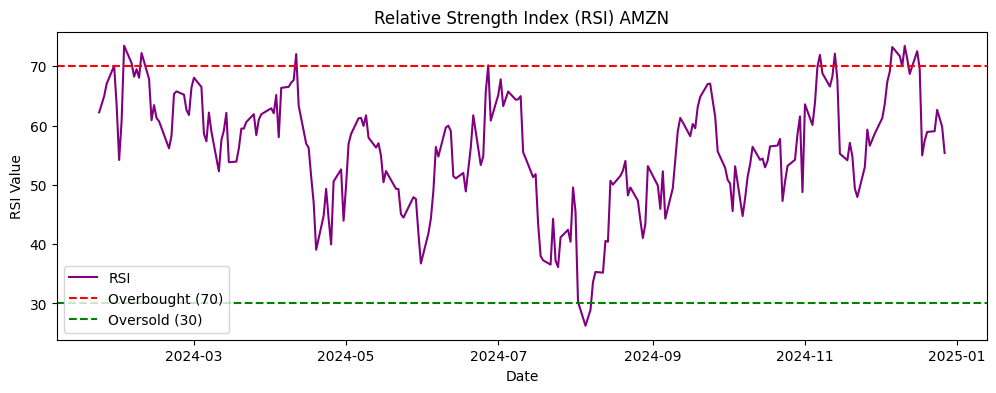

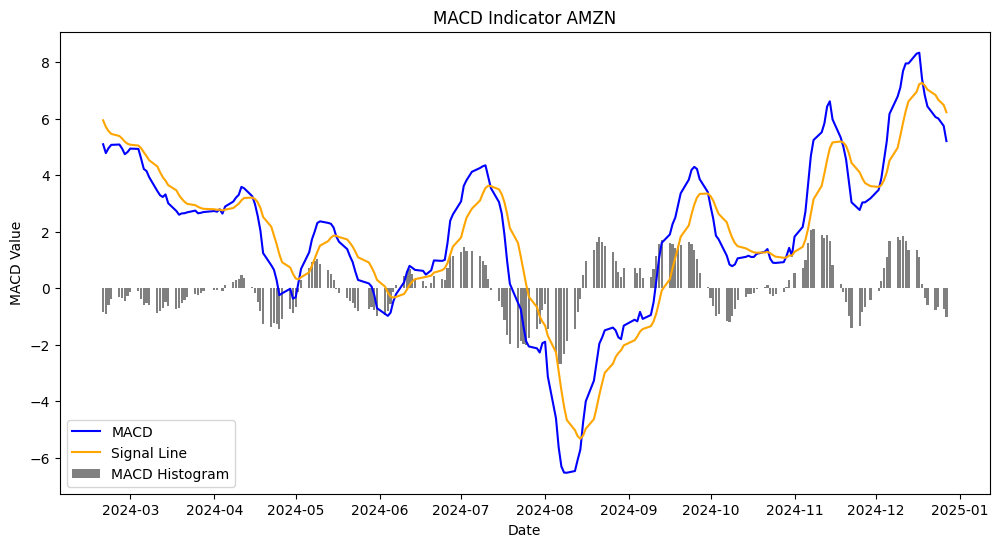

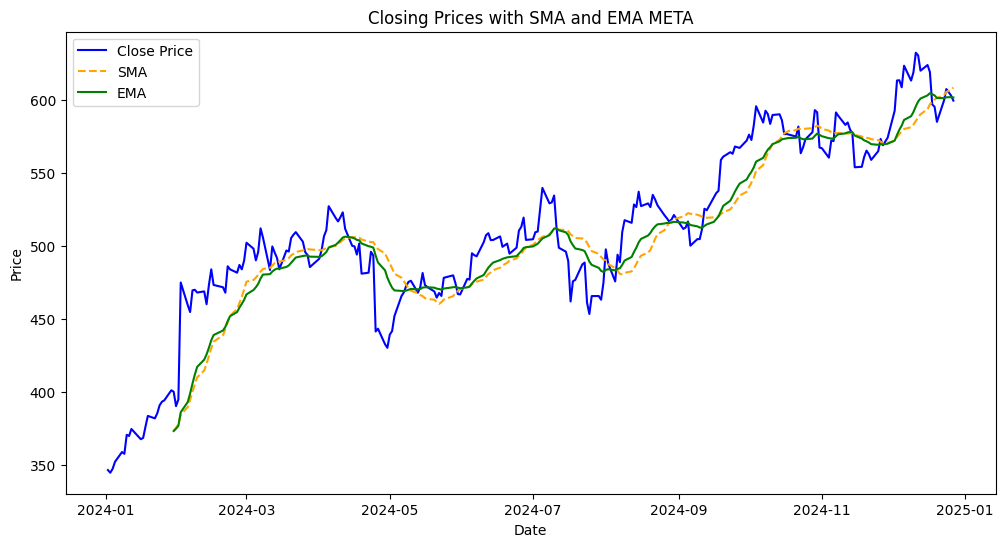

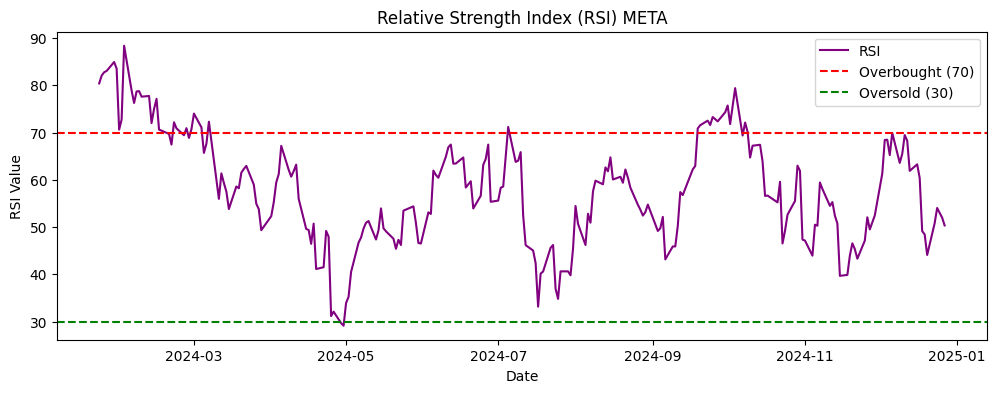

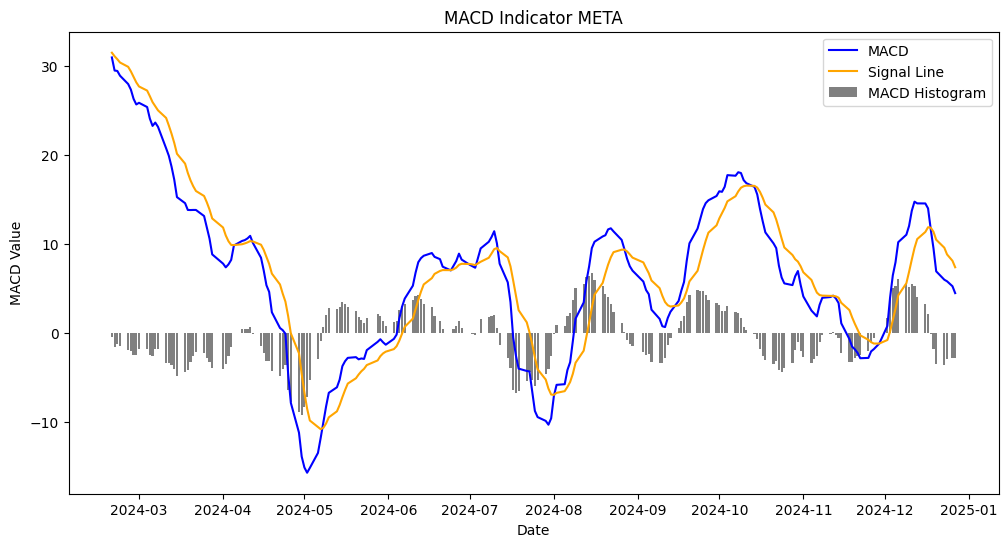

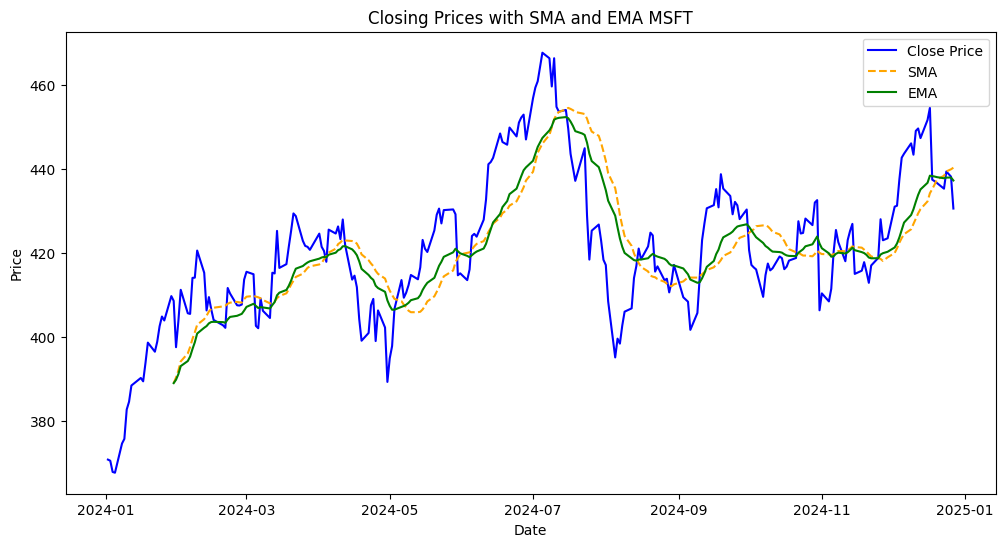

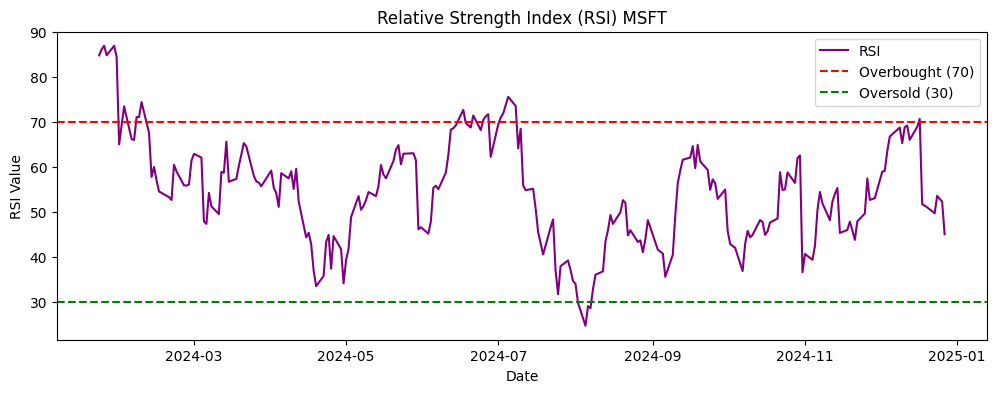

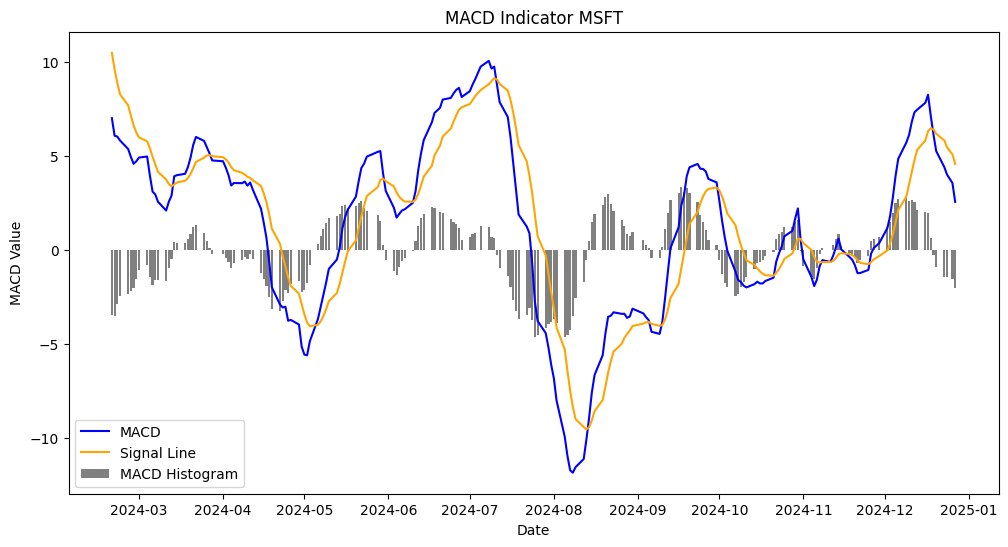

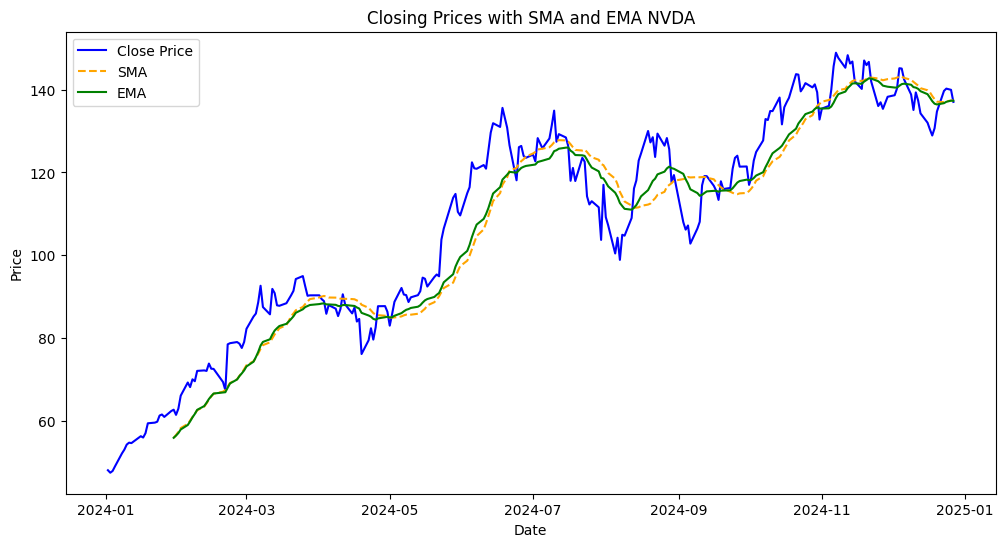

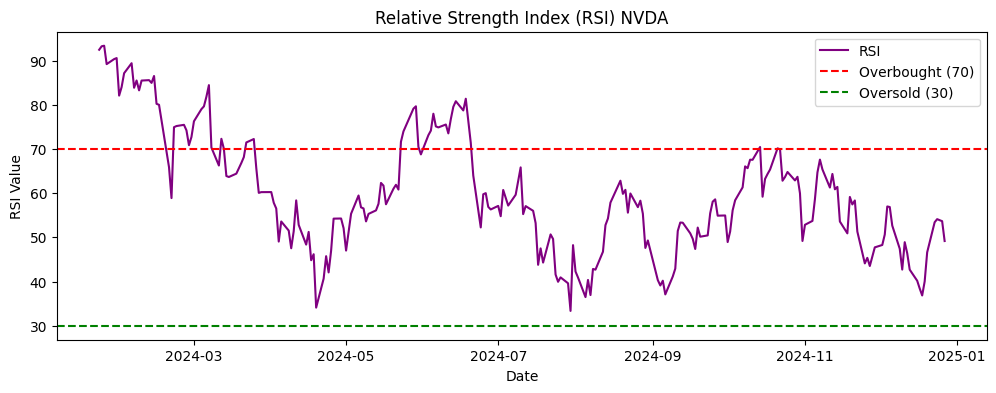

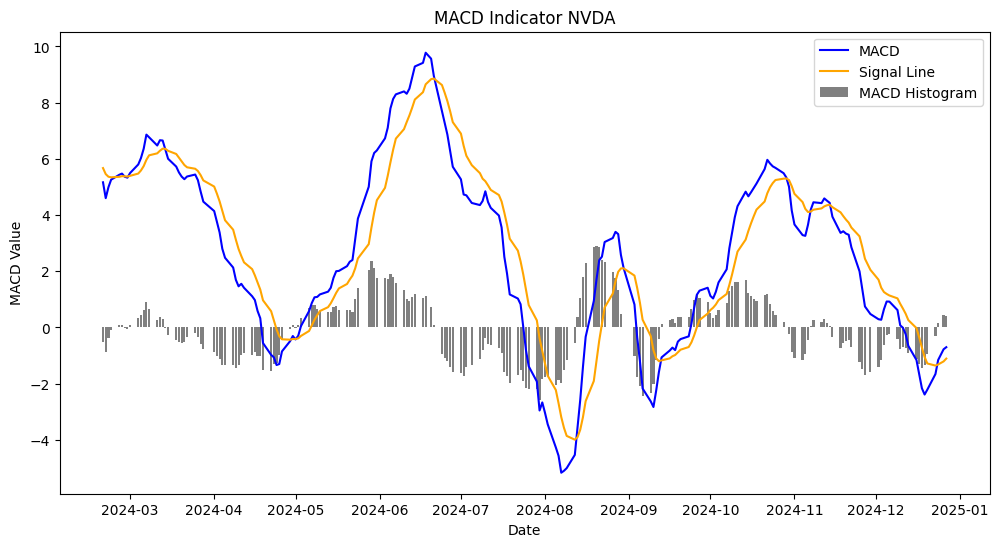

In [6]:
for key, value in dfs.items():
    value.columns = value.columns.get_level_values(0)
    visualizer = Visualizer(value, key)

    visualizer.plot_sma_ema_close()
    visualizer.plot_rsi()
    visualizer.plot_macd()

In [10]:
tickers = ['AMZN','META','MSFT','NVDA','AAPL','GOOG']
po = pm(tickers)
po.optimize_portfolio()

Max Sharpe Portfolio (risk/return):
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

Max Sharpe Portfolio Weights:
     Portfolio Weight
AMZN            0.00%
META            0.00%
MSFT            0.00%
NVDA           52.78%
AAPL            0.00%

Minimum Variance Portfolio (risk/return):
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

Minimum Variance Portfolio Weights:
     Portfolio Weight
AMZN            0.00%
META            0.98%
MSFT           47.22%
NVDA            0.00%
AAPL           36.41%
